In [1]:
import numpy as np
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt
import math

TAU = math.pi * 2

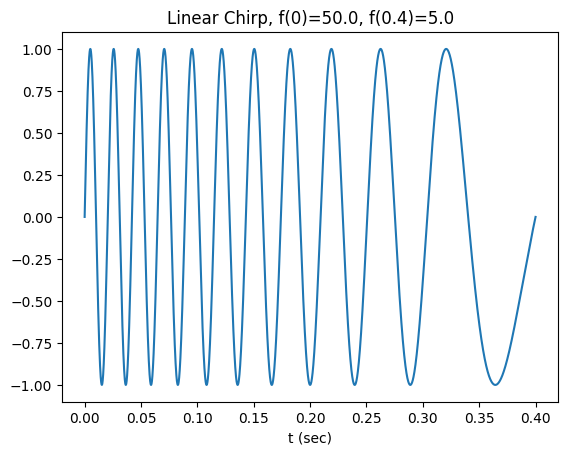

In [2]:
f0 = 50.
f1 = 5.
T = 0.4

t = np.linspace(0, T, 4800)
w = chirp(t, f0=f0, f1=f1, t1=T, method='linear', phi=270.)

plt.plot(t, w)
plt.title(f"Linear Chirp, f(0)={f0}, f({T})={f1}")
plt.xlabel('t (sec)')
plt.show()

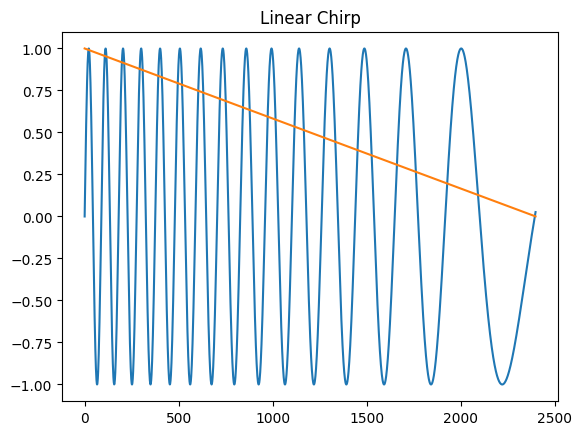

In [4]:
# parameters
T = 0.5
F1 = 50.
F0 = 5.

# constants
fs = 4800.
pd0 = F0 / fs
chirp_rate = F1 / (T*fs)

# state
p0 = 0.
p1 = 1.
f1 = F1

# generate signal
signal1 = []
signal2 = []
num_samples = int(fs * T) 
for x in list(range(num_samples)):    
    # chirp signal
    y = math.sin(TAU * (p0 + p1))
    signal1.append(y)
    
    # f1
    signal2.append(f1 / F1)
    
    # phase accumulators
    p0 += pd0
    if p0 >= 1.:
        p0 -= 1.
        
    p1 += (f1 / fs) 
    if p1 >= 1.:
        p1 -= 1.

    f1 -= chirp_rate
        
# plot signals
ys1 = np.array(signal1)
ys2 = np.array(signal2)
xs = np.arange(num_samples)
plt.title("Linear Chirp")
plt.plot(xs, ys1)
plt.plot(xs, ys2)
plt.show()